## ■ 칠판에 나온데로 신경망을 구현하기 위해 기본 골격을 이해하는 예제들

### 예제1. 28x28 필기체 데이터 100장을 생성하시오!

In [1]:
import numpy as np

x = np.random.randn(100,1,28,28)
print(x.shape)

(100, 1, 28, 28)


## 예제2. 5x5 필터를 30장 만드시오~

In [2]:
import numpy as np
W1 = np.random.randn(30,1,5,5)
print(W1.shape)

(30, 1, 5, 5)


## 예제3. 위에서 만든 입력값 x와 가중치 필터 W1을 합성곱을 한 feature map을 생성하고 shape가 칠판에 나온것과 같은지 확인하시오.
## (convoloution class를 가져와서 구현하시오)

In [ ]:
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import * 
from common.gradient import numerical_gradient
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer




x = np.random.randn(100,1,28,28)
W1 = np.random.randn(30,1,5,5)
b1 = 1

conv1 = Convolution(W1,b1)
fe_map = conv1.forward(x)
print(fe_map.shape) # (100, 30, 24, 24)

## 예제4. 위의 Convolution 계층을 통과한 output을 pooling을 통과시키고 나온 output 사이즈를 확인하시오~

In [ ]:
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import * # 여기에 만들어놓았던 모든 class들이 담겨져 있다.
from common.gradient import numerical_gradient
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

x = np.random.randn(100,1,28,28)
W1 = np.random.randn(30,1,5,5)
b1 = 1

conv1 = Convolution(W1,b1)
fe_map = conv1.forward(x)


pool1 = Pooling(2,2,stride = 2)
pool_out = pool1.forward(fe_map)
print(pool_out.shape) # (100, 30, 12, 12)

## 예제5. 위의 pooling 층을 통과한 출력 데이터가 완전 연결계층에 들어가서 가중치와 내적을 할수 있도록 W2 가중치를 생성하시오
## (칠판에 나온 완전 연결 계층 첫번째 계층의 노드수는 100개 입니다.)

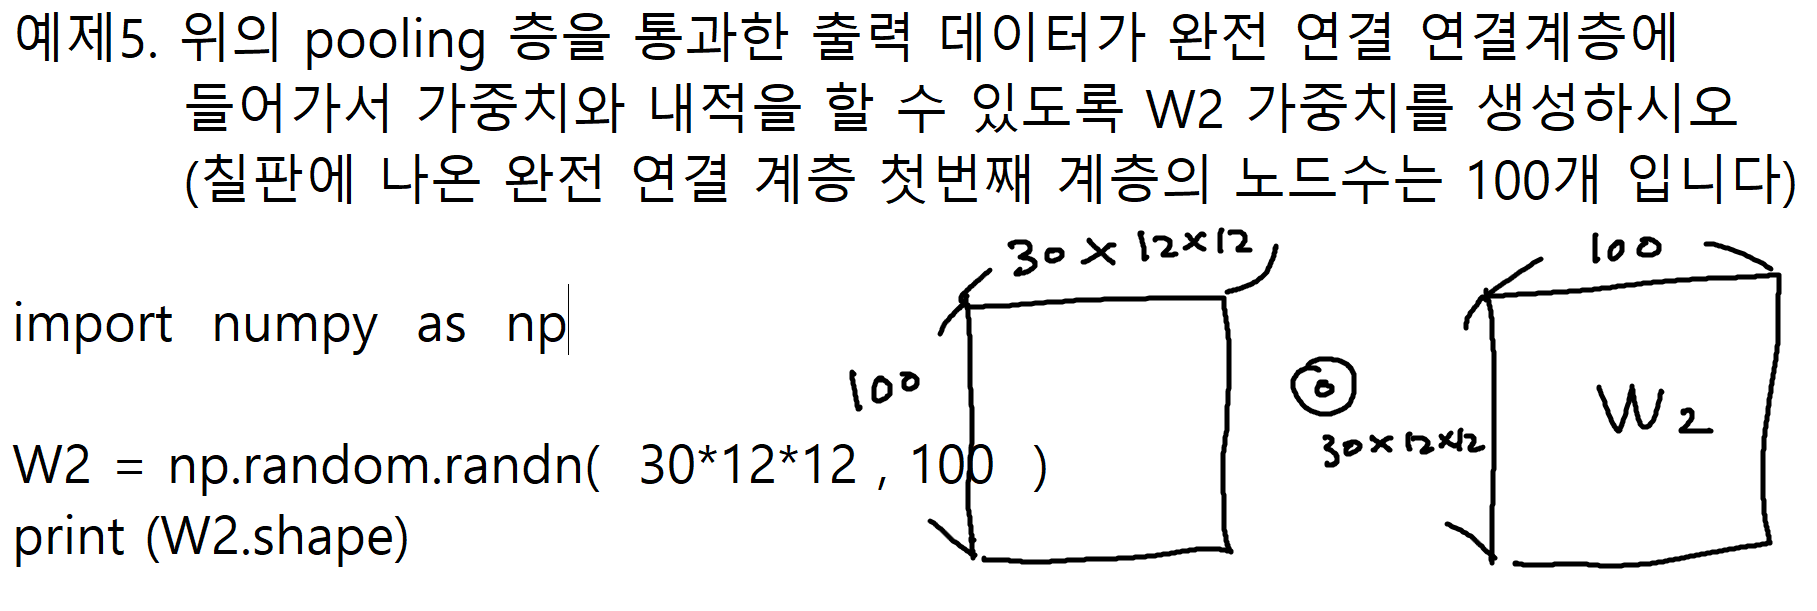

In [12]:
import numpy as np

W2 = np.random.randn(30*12*12, 100)
print(W2.shape)

(4320, 100)


## 예제6. 완전연결 계층의 W2와 내적후 더할 b2를 생성하시오!

In [13]:
import numpy as np

b2 = np.zeros(100)

## 예제7. 완전 연결계층의 마지막인 출력층의 W3와 b3를 각가 생성하시오!

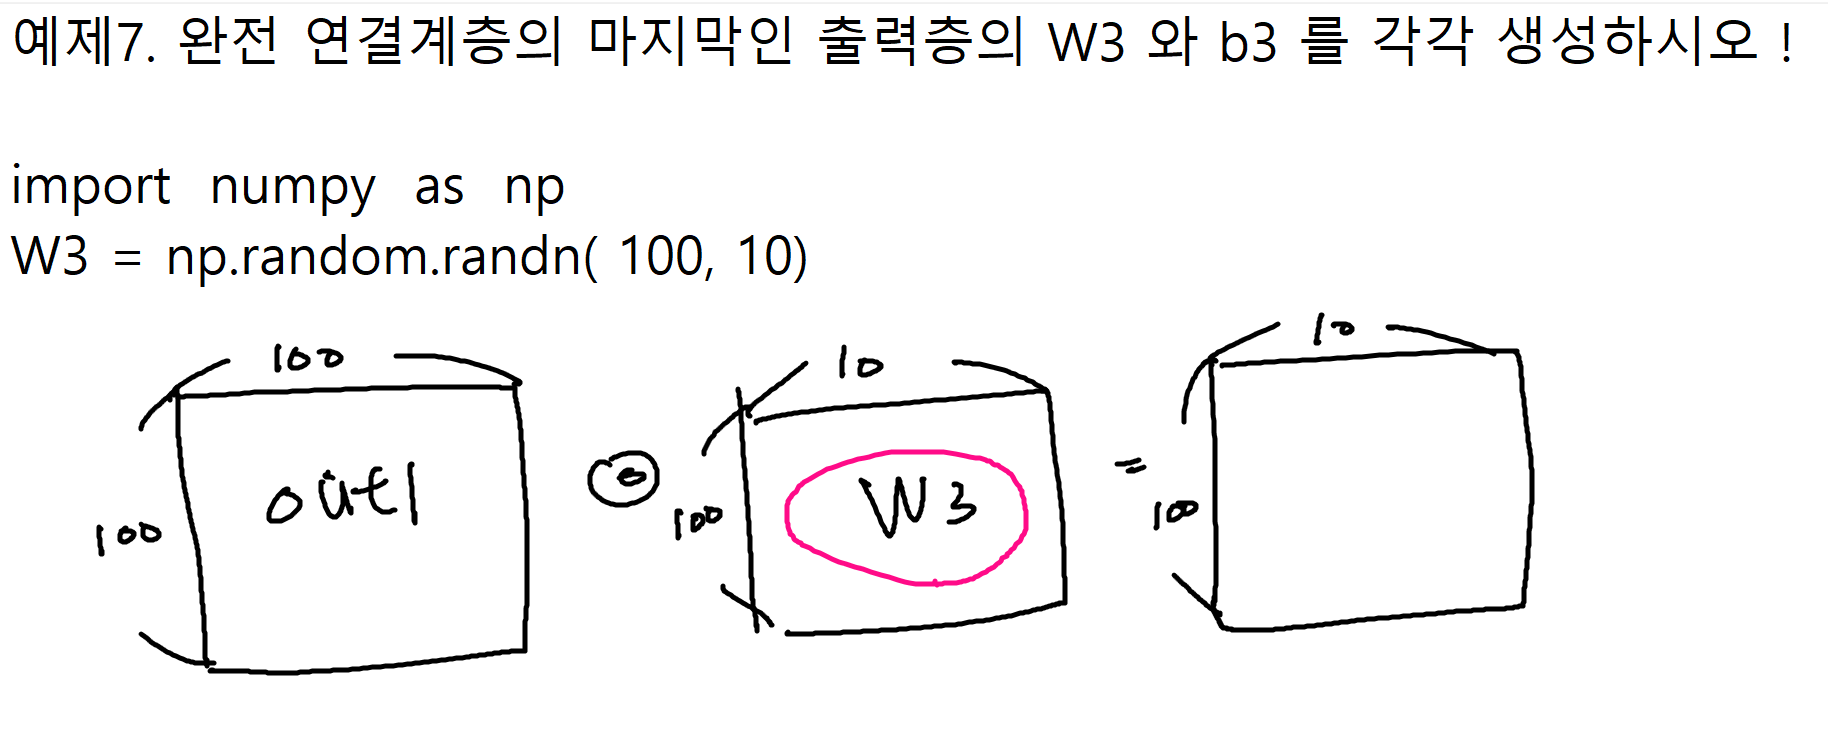

In [ ]:
import numpy as np

W3 = np.random.randn(100,10)
b3 = np.zeros(10)

## ■ CNN층 전체 코드 구현

1. CNN층이 없이 완전 연결 계층망 있는 신경망 (게시글 185번)
2. CNN층과 함께 완전 연결 계층이 있는 신경망

In [ ]:
# 1. CNN층이 없이 완전 연결 계층망 있는 신경망 (게시글 185번)
# 오차역전파를 이용한 3층 신겸망 구현하기.
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50,hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 2. CNN층과 함께 완전 연결 계층이 있는 신경망

# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num'] # 오른쪽이 key 왼쪽이 value인 상황
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1] # 28
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1 # 24
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2)) # 30 * 12 * 12 

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num) # 30
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
                            # 0.01 * np.random.randn(30*12*12, 100)
            
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]



# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## ■ CNN 구현하기 p.250

### 신경망 클래스를 초기화 할 때 받는 인수

1. input_dim : 입력데이터의 차원  
예 : Mnist의 경우 (100,1,28,28)  
예 : 개/고양이의 경우 (100,3,32,32)  
예 : 정상폐/폐결절 (100,3,32,32)  

2. filter_num : 30    
convolution 층, Affine 계층에 들어가는 가중치    
(convolutiond의 W1, b1)  


3. filter_size : 5 (filter의 가로/세로 사이즈)  
4. stride : 1  
5. pad : 0  
6. hidden_size : 100 (완전 연결계층의 노드수)
7. output_size : 10 (출력층의 노드수)
8. weight_init_std : xavier 또는 he, 0.01 (가중치의 표준 편차값)

## 문제75. 위의 신경망을 아래와 같이 구성하시오!

### 현재 : conv --> relu --> pooling --> Affine1 --> relu --> Affine2

### 변경후 : conv --> relu --> pooling --> Affine1 --> relu --> Affine2 --> relu --> Affine3 --> softmax

In [ ]:
# 2. CNN층과 함께 완전 연결 계층이 있는 신경망

# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size1=100, hidden_size2 = 100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1] # 28
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1 # 24
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2)) # 30 * 12 * 12 

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num) # 30
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size1)
            
        self.params['b2'] = np.zeros(hidden_size1)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size1, hidden_size2)
        self.params['b3'] = np.zeros(hidden_size2)
        
        self.params['W4'] = weight_init_std * \
                            np.random.randn(hidden_size2, output_size)
        self.params['b4'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W4'], self.params['b4'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W4'], grads['b4'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2', 'Affine3']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]



# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size1=100, hidden_size2 = 100, output_size = 10, weight_init_std = 0.01)


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## ■ What is Tensorflow ?

### Tensor --> 다차원
### Flow --> 흐름

__" 텐서플로우는 (tensorflow)는 기계학습과 딥러닝을 위해 구글에서 만든 오픈 소스 라이브러리 입니다. "__

4차원 배열의 연산(계산)을 빠르게 할 수 있겠금 구현이 되어짐.

## ■ Tensorflow의 장점

1. 코드가 간결해 진다.
2. 신경망 구현에 필요한 모든 함수들이 다 내장되어있다.
3. 속도가 빠름(코딩도 빠르고 실행도 빠름)
4. GPU를 사용할 수 있다.

한국시간으로 2016년 11월 29일에 나온 텐써 버젼의 핵심변경사항이 윈도우에서 GPU 버전의 텐써플로우를 지원한다는 것이다.
예전에는 리눅스 Ubunt에서만 가능하던 GPU버젼도 윈도우에서 설치가 가능하게 되었다.

## ■ 텐써 플로우를 설치하기 위한 가상 환경 설정

http://cafe.daum.net/oracleoracle/ScIc/210

## ■ 텐서 플로우 코드의 구조


1. 모델을 생성하는 부분 (그래프를 그리는 부분)
    - 오퍼레이션
    - 변수  


2. 모델을 실행하는 부분 (만들어진 그래프에 데이터를 주입하는 부분)
    - 세션

## ■ 텐서 플로우의 용어 설명

### 1. 오퍼레이션 (operation)  

  그래프 상의 노드를 오퍼레이션(줄임말 : op) 로 불린다.   
  오퍼레이션은 하나 이상의 텐서를 받을 수 있다.  
  오퍼레이션은 계산을 수행하고, 결과를 하나 이상의 텐서로 반환 할 수 있다.  
  
  
### 2. 텐서(tensor)

내부적으로 모든 데이터는 텐서를 통하여 표현된다.  
텐서는 일종의 다차원 배열인데, 그래프 내의 오퍼레이션간에 텐서가 전달된다.  

### 3. 세션(session)

그래프를 실행하기 위해서는 세션 객체가 필요하다.    
세션은 오퍼레이션의 실행 환경을 캡슐화 한것이다.  
       ↓↓↓↓↓
       
모델을 생성하는 부분( 그래프를 그리는 부분 )  
----------------------------------------------------'  
모델을 실행하는 부분(만들어진 그래프에 데이터는 주입하는 부분)

### 4. 변수(variable)

변수는 그래프의 실행시, 파라미터를 저장하고 갱신하는데 사용된다.  
메모리상의 텐서를 저장하는 버퍼 역활을 한다.  

## 예제1.

In [ ]:
import tensorflow as tf
sess = tf.Session() # 그래프를 실행한 세션을 구성한다.
hello = tf.constant('Hello, Tensorflow')
# 변수를 정의하는 영역 <-- 그래프 그리는 부분
# ----------------------------
# 변수를 실행하는 영역 <-- 그래프 실행하는 부분
# 위에서 변수를 정의했지만, 실행은 정의한 시점에서 실행되는 것은 아니다.
# session 객체와 run 메소드를 사용할 때 계산이 되어 실행이 된다.

print(sess.run(hello)) # b'Hello, Tensorflow' (binary)
print(str(sess.run(hello), encoding = "utf-8")) # Hello, Tensorflow(문자열)

### ※ 설명 : 파이썬 3버전은 문자열 unicode가 기본이므로   
### str에서 encoding 처리를 해주어야 binary타입을 unicode 타입으로 반환한다.

## 예제2.

In [ ]:
import tensorflow as tf
x = tf.constant(35, name = 'x') # x라는 상수값을 만들고 숫자 35를 지정
y = tf.Variable(x+5, name = 'y') # y라는 변수를 만들고 방정식 x+5를 정의함.
model = tf.global_variables_initializer()

# 변수를 생성했으면 변수를 초기화 해줘야하는데 초기화하는 명령어이다.
# 변수를 생성했으면 무조건 초기화 해줘야 실행이 된다.
# 변수를 정의하는 영역 <-- 그래프 그리는 부분
#---------------------------------------------------
sess = tf.Session() # 그래프를 실행할 세션을 구성한다.
sess.run(model) # 변수를 초기화 하겠다고 정의한 model을 실행하겠다.
print(sess.run(y))

## ■ 텐서플로우 세번째 예제

kaggle에 들어가서 개/고양이 사진을 다운로드 받으세요~

In [ ]:
import tensorflow as tf

a = tf.constant(10)
b = tf.constant(32)

c = tf.add(a,b)

print(c) # Tensor("Add_14:0", shape=(), dtype=int32)

## 문제 76. 위에서 만든 텐서 그래프를 실행하시오~

In [ ]:
import tensorflow as tf

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)


sess = tf.Session() # Session 클래스를 객체화 시킨다.
print(sess.run(c))
sess.close() # 세션을 닫는 구문을 작성해주어야 한다.
# 다끝나고 세션을 닫는 구문을 꼭 작성하는 습관을 들이자.

In [ ]:
# sess.close()를 안쓰는 다른 방법

import tensorflow as tf

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)


sess = tf.Session() # Session 클래스를 객체화 시킨다.

with tf.Session() as sess:
    print(sess.run(c))

### ※ with 절을 이용하면 close()를 안써도 된다.

## 문제77. 아래의 그래프를 실행하시오~

In [ ]:
import tensorflow as tf
a = tf.add(1,2)
b = tf.multiply(a,3)
c = tf.add(b,5)
d = tf.multiply(c,6)
e = tf.multiply(d,5)
f = tf.div(e,6)
g = tf.add(f,d)
h = tf.multiply(g,f)

sess = tf.Session()

with tf.Session() as sess:
    print(sess.run(h))

## ■ 텐서 플로우로 loop 문을 실행하는 방법

## 예제1. 1에서 5까지의 숫자를 출력한다.

In [16]:
# 파이썬 

for i in range(1,6):
    print(i)

1
2
3
4
5


In [ ]:
import tensorflow as tf
x = tf.Variable(0)
init = tf.global_variables_initializer()
# 변수를 생성했으면 초기화를 해줘야 실행이 되기 때문에 초기화를 해준다.

sess = tf.Session()
sess.run(init)

for i in range(5):
    x = x+1
    print(sess.run(x))
    
sess.close()

## 문제78.(오늘의 마지막 문제) 위의 코드를 이용해서 구구단 2단을 출력하시오~
## (tf.multiply 를 이용하세요~)

In [ ]:
import tensorflow as tf
x = tf.Variable(0)
init = tf.global_variables_initializer()
# 변수를 생성했으면 초기화를 해줘야 실행이 되기 때문에 초기화를 해준다.

sess = tf.Session()
sess.run(init)

for i in range(1,10):
    x += 2
    print('2 x ', i, '=', sess.run(x))

sess.close()

### 태민이가 올린 GPU PC 자리배치를 확인하고 ip 주소를 확인한 다음에 크롬으로 해당 ip주소에 컴퓨터에 접속이 되는지 확인하시오~